In [1]:
import os
import mne
from mne.datasets import sample

In [3]:
from mne.minimum_norm import apply_inverse,read_inverse_operator
from mne import read_evokeds

In [4]:
data_path = sample.data_path()
sample_dir = os.path.join(data_path, 'MEG', 'sample')
subjects_dir = os.path.join(data_path, 'subjects')

fname_evoked = data_path + '/MEG/sample/sample_audvis-ave.fif'
fname_stc = os.path.join(sample_dir, 'sample_audvis-meg')

In [5]:
stc = mne.read_source_estimate(fname_stc, subject='sample')

In [6]:
stc

<SourceEstimate  |  7498 vertices, subject : sample, tmin : 0.0 (ms), tmax : 240.0 (ms), tstep : 10.0 (ms), data shape : (7498, 25)>

Using control points [ 5.01632618  6.06303297 21.63565434]
Octahedron subdivision grade 6


<ipython-input-9-0a11e22e2236>:2: RuntimeWarning: Mayavi not found. Resorting to matplotlib 3d.
  stc.plot(subjects_dir=subjects_dir, initial_time=initial_time);


    Triangle neighbors and vertex normals...
Loading geometry from /Users/reallo/mne_data/MNE-sample-data/subjects/sample/surf/lh.sphere...
Setting up the triangulation for the decimated surface...
    10 smooth iterations done.


<ipython-input-9-0a11e22e2236>:2: RuntimeWarning: 636/155407 vertices not included in smoothing, consider increasing the number of steps
  stc.plot(subjects_dir=subjects_dir, initial_time=initial_time);


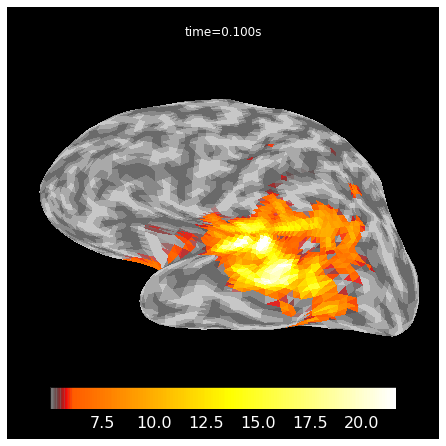

In [9]:
initial_time = 0.1
stc.plot(subjects_dir=subjects_dir, initial_time=initial_time);

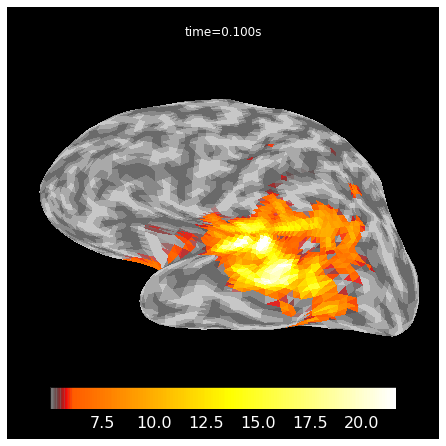

In [12]:
stc.plot(subjects_dir=subjects_dir, initial_time=initial_time,
         backend='matplotlib', verbose='error');

In [16]:
evoked = read_evokeds(fname_evoked, condition=0, baseline=(None, 0))
evoked.pick_types(meg=True, eeg=False)
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)
stc = apply_inverse(evoked, inv, lambda2, method)
stc.crop(0.0, 0.2)

Reading /Users/reallo/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 55
    Created the regularized inverter
    Created an SSP operator (subspace dimension = 3)
    Created the whitener using a noise covariance matrix with rank 302 (3 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Applying inverse operator to "Left Auditory"...
    Picked 305 channels from the data
    

<SourceEstimate  |  7498 vertices, subject : sample, tmin : 2.7755575615628914e-14 (ms), tmax : 199.79521315838792 (ms), tstep : 1.6649601096532323 (ms), data shape : (7498, 121)>

In [ ]:
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'

inv = read_inverse_operator(fname_inv)
stc = apply_inverse(evoked, inv, lambda2, 'dSPM', pick_ori='vector')
stc.plot(subject='sample', subjects_dir=subjects_dir,
         initial_time=initial_time)

In [21]:
import os
import numpy as np

from surfer import Brain
from surfer.io import read_stc

print(__doc__)

"""
create Brain object for visualization
"""
brain = Brain('fsaverage', 'split', 'inflated', size=(800, 400))

"""
read and display MNE dSPM inverse solution
"""
stc_fname = os.path.join('example_data', 'meg_source_estimate-%s.stc')
for hemi in ['lh', 'rh']:
    stc = read_stc(stc_fname % hemi)
    data = stc['data']
    times = np.arange(data.shape[1]) * stc['tstep'] + stc['tmin']
    brain.add_data(data, colormap='hot', vertices=stc['vertices'],
                   smoothing_steps=10, time=times, hemi=hemi,
                   time_label=lambda t: '%s ms' % int(round(t * 1e3)))

"""
scale colormap
"""
brain.scale_data_colormap(fmin=13, fmid=18, fmax=22, transparent=True)

"""
Save a movie. Use a large value for time_dilation because the sample stc only
covers 30 ms.
"""
brain.save_movie('example_current.mov', time_dilation=30)

brain.close()

Automatically created module for IPython interactive environment


ValueError: The subjects directory has to be specified using the subjects_dir parameter or the SUBJECTS_DIR environment variable.

#### Ref：https://mne.tools/0.17/auto_tutorials/plot_visualize_stc.html
